In [1]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
!pip install nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/gp/aw/reviews/B09G9BQS98/ref=cm_cr_dp_mb_top?ie=UTF8'

In [3]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [5]:
len(cust_name)

1241

In [6]:
len(review_title)

983

In [7]:
len(review_content)

983

In [8]:
len(rate)

983

In [9]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [11]:
df = pd.DataFrame()

In [12]:
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [13]:
df.head()

,Review Title,Rating,Reviews
0,Do not purchase this I phone,1.0 out of 5 stars,This product is duplicate of iPhone 12 only ca...
1,Damaged product received,1.0 out of 5 stars,There was a hairline scratch on the screen whi...
2,😂😂😂😂,1.0 out of 5 stars,You should be a bigggggg bot to buy this phone...
3,Excellent upgrade in context of being 90k poorer.,1.0 out of 5 stars,Just but iphone 12!It’s not worth the money!Un...
4,trash af,1.0 out of 5 stars,i am poor and i cant afford it lmao xdxdxdxdxd...


In [14]:
df.to_csv(r'E:fill.csv',index = True)

In [15]:
ta = pd.read_csv("E:fill.csv",index_col=[0])

In [18]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [20]:
data.dtypes

Review Title    object
Rating          object
Reviews         object
dtype: object

In [21]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]
data['Rating']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
978    5.0
979    5.0
980    5.0
981    5.0
982    4.0
Name: Rating, Length: 983, dtype: object

In [23]:
data['Rating'].value_counts(normalize=True)*100

5.0    71.007121
1.0    12.309257
4.0    10.986775
3.0     3.560529
2.0     2.136317
Name: Rating, dtype: float64

In [24]:
ratings=data.groupby(['Rating']).count()
ratings

,Review Title,Reviews
Rating,,
1.0,121,115
2.0,21,21
3.0,35,32
4.0,108,99
5.0,698,641


Text(0, 0.5, 'Count')

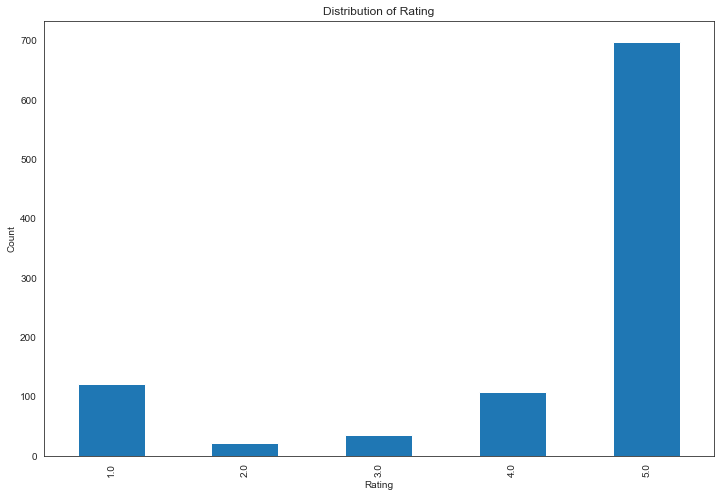

In [25]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

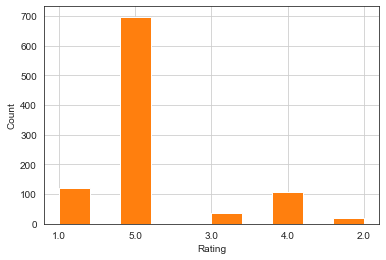

In [26]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [28]:
data.iloc[:,[2]]

,Reviews
0,This product is duplicate of iPhone 12 only ca...
1,There was a hairline scratch on the screen whi...
2,You should be a bigggggg bot to buy this phone...
3,Just but iphone 12!It’s not worth the money!Un...
4,i am poor and i cant afford it lmao xdxdxdxdxd...
...,...
978,Best Secured MobileBest in all fields.But cost...
979,NaN
980,5 out of 5 rating
981,"Don't have an fingerprint reader,charging adap..."


In [29]:
Reviews=data.iloc[:,[2]]

In [30]:
Reviews.shape

(983, 1)

In [31]:
Reviews.describe()

,Reviews
count,908
unique,852
top,The media could not be loa...
freq,21


In [32]:
Reviews.dtypes

Reviews    object
dtype: object

In [34]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Review Title"],axis=1,inplace=True)


In [35]:
data.head()

,Rating,Reviews
0,1.0,This product is duplicate of iPhone 12 only ca...
1,1.0,There was a hairline scratch on the screen whi...
2,1.0,You should be a bigggggg bot to buy this phone...
3,1.0,Just but iphone 12!It’s not worth the money!Un...
4,1.0,i am poor and i cant afford it lmao xdxdxdxdxd...


In [36]:
data.dropna(inplace=True)

In [37]:
#Cleaning the text input for betting understanding of Machine..##

#Converting all review into Lowercase..###
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [38]:
# removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [39]:
# Remove Numbers from review
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21676/2413098589.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [40]:
# removing all stopwords(english)
from nltk.corpus import stopwords

In [41]:
stop_words=stopwords.words('english')

In [42]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [43]:
data

,Rating,Reviews
0,1.0,product duplicate iphone camera design changed...
1,1.0,hairline scratch screen clearly visible direct...
2,1.0,bigggggg bot buy phoneyou could get iphone pro...
3,1.0,iphone it’s worth moneyunless ur bjp something...
4,1.0,poor cant afford lmao xdxdxdxdxd money flex bu...
...,...,...
977,5.0,gift wife never wanted use phone k xiaomi bran...
978,5.0,best secured mobilebest fieldsbut costly affai...
980,5.0,rating
981,5.0,dont fingerprint readercharging adapter alo in...


In [44]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [45]:
data['Reviews'].head()

0    product duplicate iphone camera design changed...
1    hairline scratch screen clearly visible direct...
2    bigggggg bot buy phoneyou could get iphone pro...
3    iphone it’s worth moneyunless ur bjp something...
4    poor cant afford lmao xdxdxdxdxd money flex bu...
Name: Reviews, dtype: object

In [46]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

     aagenote  aaya  aaye  ab  able  aboutoverall  absolute  absolutely  abt  \
0           0     0     0   0     0             0         0           0    0   
1           0     0     0   0     0             0         0           0    0   
2           0     0     0   0     0             0         0           0    0   
3           0     0     0   0     0             0         0           0    0   
4           0     0     0   0     0             0         0           0    0   
..        ...   ...   ...  ..   ...           ...       ...         ...  ...   
903         0     0     0   0     0             0         0           0    0   
904         0     0     0   0     0             0         0           0    0   
905         0     0     0   0     0             0         0           0    0   
906         0     0     0   0     0             0         0           0    0   
907         0     0     0   0     0             0         0           0    0   

     acceptable  ...  yr  zabardast  zo

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


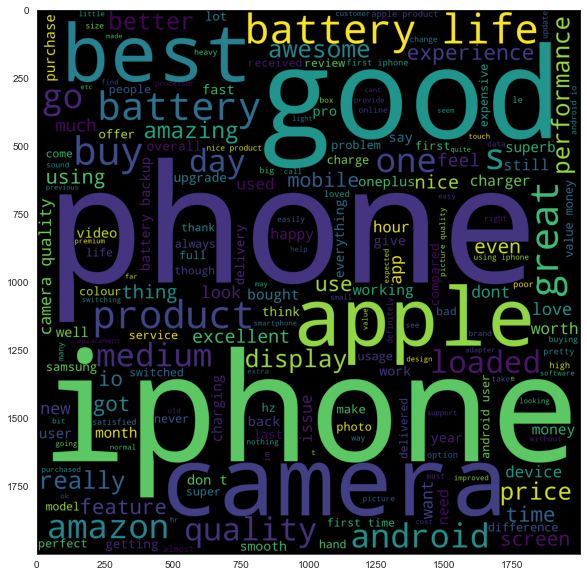

In [47]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [48]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21676/2640507917.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')


0    product duplicate iphone camera design changed...
1    hairline scratch screen clearly visible direct...
2    bigggggg bot buy phoneyou could get iphone pro...
3    iphone its worth moneyunless ur bjp something ...
4    poor cant afford lmao xdxdxdxdxd money flex bu...
Name: Reviews, dtype: object

# Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [50]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

phone      437
iphone     403
good       269
battery    247
camera     231
apple      159
product    149
best       139
life       134
quality    128
dtype: int64

Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [51]:
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()

0      duplicate design changed low buy samsung mobile
1    hairline scratch screen clearly visible direct...
2        bigggggg bot buy phoneyou could get pro thats
3    its worth moneyunless ur bjp something youre f...
4    poor cant afford lmao xdxdxdxdxd money flex bu...
Name: Reviews, dtype: object

Rare words removal

Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [52]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq

yearsyet          1
offmost           1
converted         1
androidearlier    1
gesture           1
outperforming     1
bankadapter       1
input             1
thisthanksvenu    1
phonecamera       1
dtype: int64

In [53]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0       duplicate design changed low buy samson mobile
1    airline scratch screen clearly visible directl...
2         bigggggg not buy phoneyou could get pro that
3    its worth moneyunless or by something your ful...
4    poor can afford may xdxdxdxdxd money flex buy ...
5    medium could loaded switched andros iosthere m...
6    honest review going broke buying deprecating o...
7     money get dream get definitely fulfilled one day
8    medium could loaded four time hang facing diff...
9                       ever reading review suggest go
Name: Reviews, dtype: object

# Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our reviews into a blob and then converted them into a series of words.

In [54]:
TextBlob(data['Reviews'][0]).words

WordList(['duplicate', 'design', 'changed', 'low', 'buy', 'samsung', 'mobile'])

In [56]:
TextBlob(data['Reviews'][1]).words

WordList(['hairline', 'scratch', 'screen', 'clearly', 'visible', 'directly', 'tried', 'contacting', 'amazon', 'replacement', 'asked', 'connect', 'connected', 'asked', 'connect', 'amazon', 'blame', 'game', 'begin', 'end', 'paying', 'price', 'awfull', 'service', 'going', 'tag', 'social', 'medium', 'amazon', 'big', 'scam'])

# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library

In [57]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0            duplic design chang low buy samsung mobil
1    hairlin scratch screen clearli visibl directli...
2           bigggggg bot buy phoney could get pro that
3    it worth moneyunless ur bjp someth your full c...
4    poor cant afford lmao xdxdxdxdxd money flex bu...
5    medium could load switch android iosther mani ...
6    honest review go broke buy depreci objecti use...
7           money get dream get definit fulfil one day
8    medium could load four time hang face difficul...
9                          ever read review suggest go
Name: Reviews, dtype: object

# Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [58]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()

0      duplicate design changed low buy samsung mobile
1    hairline scratch screen clearly visible direct...
2        bigggggg bot buy phoneyou could get pro thats
3    it worth moneyunless ur bjp something youre fu...
4    poor cant afford lmao xdxdxdxdxd money flex bu...
Name: Reviews, dtype: object

# Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

N-grams

N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

In [59]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['duplicate', 'design']),
 WordList(['design', 'changed']),
 WordList(['changed', 'low']),
 WordList(['low', 'buy']),
 WordList(['buy', 'samsung']),
 WordList(['samsung', 'mobile'])]

# Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [60]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,amazon,3.0
1,asked,2.0
2,connect,2.0
3,hairline,1.0
4,begin,1.0
...,...,...
253,solve,1.0
254,problem,1.0
255,ever,1.0
256,reading,1.0


# Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [61]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))
tf1

,words,tf,idf
0,amazon,3.0,2.562749
1,asked,2.0,5.712632
2,connect,2.0,4.326338
3,hairline,1.0,6.811244
4,begin,1.0,6.118097
...,...,...,...
253,solve,1.0,5.424950
254,problem,1.0,3.815512
255,ever,1.0,2.176515
256,reading,1.0,5.424950


# Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [62]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,amazon,3.0,2.562749,7.688247
1,asked,2.0,5.712632,11.425264
2,connect,2.0,4.326338,8.652675
3,hairline,1.0,6.811244,6.811244
4,begin,1.0,6.118097,6.118097
...,...,...,...,...
253,solve,1.0,5.424950,5.424950
254,problem,1.0,3.815512,3.815512
255,ever,1.0,2.176515,2.176515
256,reading,1.0,5.424950,5.424950


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<908x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7533 stored elements in Compressed Sparse Row format>

# Bag of Words
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<908x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8710 stored elements in Compressed Sparse Row format>

# Sentiment Analysis
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library),let’s check the sentiment of the first few reviews.

In [66]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0                                   (0.0, 0.3)
1                 (-0.03333333333333334, 0.27)
2                                   (0.0, 0.0)
3    (0.04999999999999997, 0.5499999999999999)
4                                 (-0.2, 0.72)
5                   (0.47222222222222227, 0.5)
6    (0.09857104700854702, 0.5116853632478632)
7                                   (0.0, 0.5)
8                                   (0.0, 0.0)
9                                   (0.0, 0.0)
Name: Reviews, dtype: object

# Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [67]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,duplicate design changed low buy samsung mobile,0.000000
1,hairline scratch screen clearly visible direct...,-0.033333
2,bigggggg bot buy phoneyou could get pro thats,0.000000
3,it worth moneyunless ur bjp something youre fu...,0.050000
4,poor cant afford lmao xdxdxdxdxd money flex bu...,-0.200000


# Word Embeddings
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

In [69]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.Collecting gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [70]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [84]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,duplicate design changed low buy samsung mobile,0.000000
1,hairline scratch screen clearly visible direct...,-0.033333
2,bigggggg bot buy phoneyou could get pro thats,0.000000
3,it worth moneyunless ur bjp something youre fu...,0.050000
4,poor cant afford lmao xdxdxdxdxd money flex bu...,-0.200000


In [85]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
3,1.0,it worth moneyunless ur bjp something youre fu...,0.050000,0.050000
5,1.0,medium could loaded switched android iosthere ...,0.472222,0.472222
6,5.0,honest review going broke buying depreciating ...,0.098571,0.098571
10,3.0,marketing done quite job month month keep peop...,0.287835,0.287835
11,5.0,got beautiful machine really happy issue backu...,0.365427,0.365427


In [86]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [87]:
sent_type(data['polarity'])

neutral
negative
neutral
positive
negative
positive
positive
neutral
neutral
neutral
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
neutral
positive
neutral
positive
positive
positive
negative
positive
positive
positive
positive
neutral
neutral
neutral
neutral
negative
neutral
negative
neutral
negative
positive
positive
positive
positive
neutral
positive
positive
negative
neutral
neutral
positive
negative
positive
positive
positive
neutral
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
neutral
positive
positive
neutral
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
posit